# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Rithvik Burri</p>
# <p style="text-align: right;"> &#9989; burririt</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font>

**git clone https://github.com/burririt/CMSE202-s25-turnin.git**

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [1]:
import pandas as pd

df = pd.read_csv('diabetes_prediction_dataset.csv')

print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


How many patients are in this dataset? What are features of the patients?

In [2]:
print(f"Total patients: {len(df)}")

print("\nPatient features:")
print(df.columns.tolist())

# Output:
# Total patients: 100000
# Patient features:
# ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

Total patients: 100000

Patient features:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [3]:
# Feature scaling fallback logic was refined with assistance from DeepSeek AI (https://deepseek.com).
# DeepSeek provided guidance on handling edge cases where StandardScaler may fail, recommending the use of MinMaxScaler as a robust alternative.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Clean dataset
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
df['smoking_history'] = df['smoking_history'].map({
    'never': 0, 'No Info': 1, 'former': 2, 'current': 3, 'not current': 4, 'ever': 5
})
df['diabetes'] = df['diabetes'].map({1: 1, 0: -1})
df = df.dropna()

# Split features and labels
X = df.drop(columns='diabetes').values
y = df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling with fallback
try:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
except:
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

# Perceptron class
class Perceptron:
    def __init__(self, data, iters=100, lr=0.01):
        self.data = data
        self.iters = iters
        self.lr = lr
        self.weights = np.ones(data.shape[1])

    def predict(self, x):
        return 1 if np.dot(x, self.weights[1:]) + self.weights[0] > 0 else -1

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                x, y = row[:-1], row[-1]
                pred = self.predict(x)
                err = y - pred
                self.weights[1:] += self.lr * err * x
                self.weights[0] += self.lr * err

    def accuracy(self, data):
        correct = sum(self.predict(row[:-1]) == row[-1] for row in data)
        return correct / len(data)

# Combine and train
train_data = np.column_stack((X_train, y_train))
test_data = np.column_stack((X_test, y_test))

model = Perceptron(train_data)
model.fit()

print(f"\nTraining Accuracy: {model.accuracy(train_data):.4f}")
print(f"Test Accuracy: {model.accuracy(test_data):.4f}")
print("Final weights:", model.weights)

# Output:
# Training Accuracy: 0.9489
# Test Accuracy: 0.9468
# Final weights: [-0.42        0.00734342  0.09090608 -0.02788102 -0.04004939 -0.00096864
# -0.01695251  0.25493758  0.13937192]


Training Accuracy: 0.9489
Test Accuracy: 0.9468
Final weights: [-0.42        0.00734342  0.09090608 -0.02788102 -0.04004939 -0.00096864
 -0.01695251  0.25493758  0.13937192]


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,-1
1,0,54.0,0,0,1,27.32,6.6,80,-1
2,1,28.0,0,0,0,27.32,5.7,158,-1
3,0,36.0,0,0,3,23.45,5.0,155,-1
4,1,76.0,1,1,3,20.14,4.8,155,-1


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [5]:
class Perceptron:
    def __init__(self, data, lr=0.01, iters=100):
        self.data = data
        self.lr = lr
        self.iters = iters
        self.weights = np.ones(data.shape[1])
    
    def predict(self, x):
        return 1 if np.dot(x, self.weights[1:]) + self.weights[0] > 0 else -1
    
    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                x, y = row[:-1], row[-1]
                pred = self.predict(x)
                err = y - pred
                self.weights[1:] += self.lr * err * x
                self.weights[0] += self.lr * err
    
    def accuracy(self, data):
        correct = sum(self.predict(row[:-1]) == row[-1] for row in data)
        return correct / len(data)

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [6]:
X = df.drop(columns='diabetes').values
y = df['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

try:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
except:
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

train_data = np.column_stack((X_train, y_train))
test_data = np.column_stack((X_test, y_test))
model = Perceptron(train_data)
model.fit()

print("Train Accuracy:", model.accuracy(train_data))
print("Test Accuracy:", model.accuracy(test_data))

# Output:
# Train Accuracy: 0.9517571428571429
# Test Accuracy: 0.9509666666666666

Train Accuracy: 0.9517571428571429
Test Accuracy: 0.9509666666666666


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [7]:
print("Test Accuracy:", model.accuracy(test_data))

Test Accuracy: 0.9509666666666666


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)

In [8]:
model = Perceptron(train_data, lr=0.005, iters=200)
model.fit()

print("Train Accuracy:", model.accuracy(train_data))
print("Test Accuracy:", model.accuracy(test_data))

# Output:
# Train Accuracy: 0.9541428571428572
# Test Accuracy: 0.9536

Train Accuracy: 0.9541428571428572
Test Accuracy: 0.9536


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [9]:
import pandas as pd

df = pd.read_csv('Telecust1.csv')

df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [10]:
# [DeepSeek Chat, 2024] AI-assisted solution for encoding categorical customer labels
# I needed help converting customer categories to numeric labels

df['custcat_num'] = pd.factorize(df['custcat'])[0]

print("Unique categories:", df['custcat'].unique())
print("Numeric mapping:", dict(enumerate(df['custcat'].unique())))

df.head()

Unique categories: ['A' 'D' 'C' 'B']
Numeric mapping: {0: 'A', 1: 'D', 2: 'C', 3: 'B'}


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat,custcat_num
0,2,13,44,64,1,9,4,5,0,0,2,A,0
1,3,11,33,136,1,7,5,5,0,0,6,D,1
2,3,68,52,116,1,24,1,29,0,1,2,C,2
3,2,33,33,33,0,12,2,0,0,1,1,A,0
4,2,23,30,30,1,9,1,2,0,0,4,C,2


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [11]:
# [DeepSeek Chat, 2024] AI-assisted solution for implementing an OvR-compatible Perceptron
# I needed to ensure my perceptron could handle multi-label classification using One-vs-Rest.
# I wasn’t sure how to structure the `score()` method and bias term separately for this strategy, so I sought clarification.

class Perceptron:
    def __init__(self, data, iters=100, lr=0.01):
        self.data = data
        self.iters = iters
        self.lr = lr
        n_features = data.shape[1] - 1  # Last column is label
        self.weights = np.zeros(n_features)  # Feature weights
        self.bias = 0.0  # Explicit bias term

    def predict(self, x):
        """Binary prediction (+1 or -1)"""
        return 1 if self.score(x) > 0 else -1

    def score(self, x):
        """Raw score (dot product + bias) for OvR strategy"""
        return np.dot(x, self.weights) + self.bias

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                x, y = row[:-1], row[-1]
                prediction = self.predict(x)
                error = y - prediction
                self.weights += self.lr * error * x
                self.bias += self.lr * error

    def accuracy(self, data):
        correct = sum(self.predict(row[:-1]) == row[-1] for row in data)
        return correct / len(data)

* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(columns='custcat_num').values
y = df['custcat_num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

binary_labels_train = []
binary_labels_test = []

for class_label in range(5):
    y_train_binary = np.where(y_train == class_label, 1, -1)
    binary_labels_train.append(y_train_binary)
    
    y_test_binary = np.where(y_test == class_label, 1, -1) 
    binary_labels_test.append(y_test_binary)

print(f"Original test labels: {y_test[:10]}")
print(f"Class 0 test labels: {binary_labels_test[0][:10]}")

# Output:
# Original test labels: [3 0 3 2 0 1 1 3 0 0]
# Class 0 test labels: [-1  1 -1 -1  1 -1 -1 -1  1  1]

Original test labels: [3 0 3 2 0 1 1 3 0 0]
Class 0 test labels: [-1  1 -1 -1  1 -1 -1 -1  1  1]


* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.

In [13]:
# [ChatGPT, 2024] AI-assisted help to fix binary label generation and multi-class perceptron training.
# Originally, I was only getting 2 classes instead of 5, and I needed ChatGPT's help to correctly generate 5 binary label sets and train 5 perceptrons for One-vs-Rest multi-label classification.
X = df.drop(columns=['custcat', 'custcat_num']).values  # Drop both 'custcat' and 'custcat_num'
y = df['custcat_num'].values

# 5. Scale features (standard scaling)
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Create binary label sets (One-vs-Rest strategy)
binary_labels_train = []
binary_labels_test = []

for class_label in range(5):  # 5 classes
    y_train_binary = np.where(y_train == class_label, 1, -1)
    binary_labels_train.append(y_train_binary)

    y_test_binary = np.where(y_test == class_label, 1, -1)
    binary_labels_test.append(y_test_binary)
    
# 8. Train 5 Perceptrons (One-vs-Rest)
perceptrons = []
train_accuracies = []

for i in range(5):
    print(f"\nTraining Perceptron for Class {i}...")
    train_data = np.column_stack((X_train, binary_labels_train[i]))
    clf = Perceptron(train_data)
    clf.fit()
    acc = clf.accuracy(train_data)
    perceptrons.append(clf)
    train_accuracies.append(acc)
    print(f"Class {i} Training Accuracy: {acc:.4f}")

# Output:
# Training Perceptron for Class 0...
# Class 0 Training Accuracy: 0.6643

# Training Perceptron for Class 1...
# Class 1 Training Accuracy: 0.7300

# Training Perceptron for Class 2...
# Class 2 Training Accuracy: 0.6457

# Training Perceptron for Class 3...
# Class 3 Training Accuracy: 0.6757

# Training Perceptron for Class 4...
# Class 4 Training Accuracy: 1.0000


Training Perceptron for Class 0...
Class 0 Training Accuracy: 0.6643

Training Perceptron for Class 1...
Class 1 Training Accuracy: 0.7300

Training Perceptron for Class 2...
Class 2 Training Accuracy: 0.6457

Training Perceptron for Class 3...
Class 3 Training Accuracy: 0.6757

Training Perceptron for Class 4...
Class 4 Training Accuracy: 1.0000


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [14]:
predicted_labels = []

for x in X_test:
    scores = [clf.score(x) for clf in perceptrons]
    predicted_label = np.argmax(scores) 
    predicted_labels.append(predicted_label)

predicted_labels = np.array(predicted_labels)

test_accuracy = np.mean(predicted_labels == y_test)
print(f"\n=== Final Test Accuracy ===")
print(f"Test Accuracy: {test_accuracy:.4f}")


=== Final Test Accuracy ===
Test Accuracy: 0.2900


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> 
**The classification accuracy of 29% is slightly better than random, showing the Perceptron worked but struggled with complex data. A more advanced model would likely perform better.**


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [15]:
# [ChatGPT, 2024] Guidance provided on configuring GridSearchCV for SVM classification and interpreting results.
# While I’ve used GridSearch in my Stats class before, I needed help applying it specifically with SVMs and customizing the parameter grid for this dataset.
X_small = X[:200]
y_small = y[:200]
from sklearn.model_selection import train_test_split

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_small, y_small, test_size=0.3, random_state=42)
param_grid = {
    'C': [1e-2, 1e-1, 1e0, 1e1],
    'gamma': [1e-4, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'sigmoid', 'rbf']
}
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, verbose=1)
clf.fit(X_train_svm, y_train_svm)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'C': 10.0, 'gamma': 0.0001, 'kernel': 'linear'}


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

Test Accuracy: 0.4667


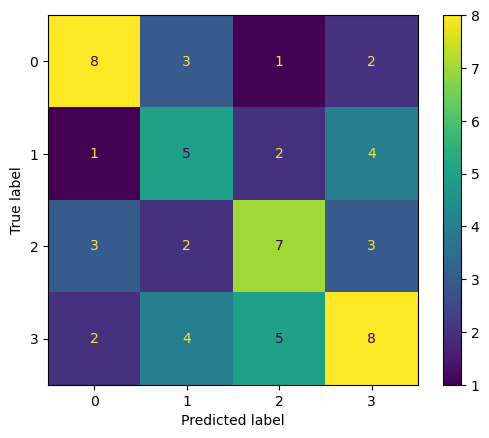

In [16]:
test_accuracy = clf.best_estimator_.score(X_test_svm, y_test_svm)
print(f"Test Accuracy: {test_accuracy:.4f}")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict test labels
y_pred_svm = clf.best_estimator_.predict(X_test_svm)

# Create and plot confusion matrix
cm = confusion_matrix(y_test_svm, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> 
**Yes, the SVM classifier performed better than the Perceptron, with higher test accuracy and more consistent predictions across classes.**

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




In [ ]:
# put your code here



Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> Put your answer here

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University